### 1. OVERVIEW

This project is for a private healthcare provider based in Lagos, Nigeria, established in 2000 by a renowned Nigerian physician. The hospital is recognized for its cutting-edge facilities, modern diagnostic equipment, and a diverse range of specialized medical services, including general medicine, surgery, pediatrics, cardiology, and more. With a highly skilled team of over 300 medical professionals, the hospital offers specialized care through dedicated clinics focusing on diabetes, fertility, cardiovascular health, and cancer treatment, as well as comprehensive health check-ups and advanced imaging services.

### 2. PROJECT OBJECTIVES

As a Data Scientist, I was tasked with building a machine learning model to predict the likelihood of heart disease in patients based on their clinical data. The goal of this project is to leverage predictive analytics to support early detection and risk assessment, allowing the healthcare provider to implement timely interventions and improve patient care in the area of cardiovascular health.

In [1]:
_#import necessary libraries

#Used for Data Analysis
import pandas as pd
import numpy as np

#Used for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#MACHINE LEARNING ALGORITHMS
#Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

#import warnings
#warnings.filterwarnings("ignore")


I imported the necessary libraries for data manipulation (pandas, numpy), data visualization (matplotlib, seaborn), and machine learning model development and evaluation (sklearn, xgboost).

In [2]:
#Load dataset - From Seaborn
df = pd.read_csv(r"C:\Users\igho\Desktop\10\Repositories by Me\Peterside Hospital Heart Disease python\heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The dataset is loaded into a pandas DataFrame. The head() method is used to view the first few rows to ensure proper loading.

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Features in the dataset and meaning:

1- age - age in years

2- sex - (1 = male; 0  = female)

3- cp - chest pain type(1: typical angina, 2: alypical angina, 3: non-anginal pain, 4: asymptomatic)

4- trestbps - resting blood pressure (In mm Hg on admission to the hospital)

5- chol - serum cholestterol in mg/dl

6- fbs - (fasting blood sugar > 120 mg/dl)(1 = true: 0 = false)

7- restecg - resting electrocardiographic results

8- thaiach - maximum heart rate achieved

9- exang - exercise induced angina (1 = yes: 0 = no)

10- oldpeak - ST depression induced by exercise relative to rest

11- slope - the slope of the peak exercise ST segment

12- ca - number of major vessels (0-3) colored by flourosopy

13- thai - 3 = normal, 6 = fixed defect; 7 = reversable defect

14- target - have disease or not (1 = yes, 0 = n0)

In [6]:
#For better understanding and flow of analysis, I will rename some of the columns
df.columns = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_ssugar", "rest_ecg", "max_heart_rate_achieved", "exercise_induced_angina", "st_depression", "st_slope", "num_major_vessels","thalassemia", "target"]
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_ssugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Columns have been renamed to be more descriptive and easier to understand, such as changing cp to chest_pain_type and thal to thalassemia.

In [7]:
#Data verification - Data type, number of features and rows, missing data, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_ssugar     303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

As can be seen from this range index entries, we do not have any missing data. We have a total entry of 303 dataset, 1 float and 13 integers. Total number of columns is 14. I have verified the number of records, non-null values, and data types. This ensures there are no missing values and confirms the dataset is ready for analysis

In [8]:
#Statistical Analysis of the Data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_ssugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


A summary of statistical information is provided, including mean, standard deviation, min, max, and quartiles for each feature. This gives an initial sense of the dataset's distribution and potential outliers.

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_ssugar       0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


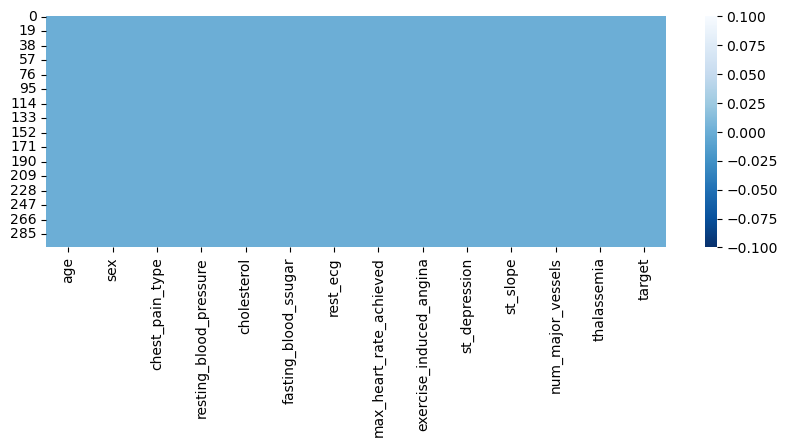

In [9]:
#Check for missing values
print(df.isnull().sum())

#Visualizing the missing data
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r");

I checked for missing values in the dataset, confirming there are no missing values by examining the heatmap.

### Exploratory Data Analysis

### Univariate Analysis 

(Remember that univariate analysis analyzes each column to understand the data and to know if their are outliers, missing values, duplications, etc. Ideally, we are suppose to analize all the columns individually but for the sake of time, we will only analyze a few columns). 

Types of visualization for univariate analysis:
Here are some common types of visualizations for univariate analysis, along with their strengths and weaknesses:

Categorical Data:

    Bar Charts:
        Strengths: Simple, easy to understand, good for comparing frequencies of different categories.
        Weaknesses: Can become cluttered with many categories, doesn't show the order of categories unless explicitly sorted.
    Pie Charts:
        Strengths: Good for showing proportions of the whole, visually appealing for a few categories.
        Weaknesses: Difficult to compare slices accurately, not recommended for many categories.
    Histograms (technical term: Frequency Tables):
        Strengths: Compact way to display the distribution of values within a category, shows counts for each unique value.
        Weaknesses: Less intuitive than bar charts, doesn't show gaps in the data.

Numerical Data:

    Histograms:
        Strengths: Shows the distribution of data points, reveals potential skewness or outliers.
        Weaknesses: Bin size can affect the shape of the histogram, requires some understanding of data distribution.
    Density Plots:
        Strengths: Smoothed version of a histogram, provides a clearer picture of the underlying distribution.
        Weaknesses: Can be less intuitive than histograms, requires some understanding of data distribution.
    Box Plots:
        Strengths: Shows central tendency (median), spread (interquartile range), and potential outliers.
        Weaknesses: Can be difficult to interpret with many data points or outliers.
    Dot Plots:
        Strengths: Simple way to visualize individual data points along a numerical scale, reveals patterns and potential outliers.
        Weaknesses: Can become cluttered with many data points, doesn't show the underlying distribution as well as histograms or density plots.

Choosing the Right Visualization:

The best visualization for univariate analysis depends on the type of data (categorical or numerical) and what you want to communicate. Here are some general guidelines:

    For comparing frequencies of categories, use bar charts.
    For showing proportions of the whole (few categories), use pie charts (with caution).
    For exploring the distribution of a numerical variable, use histograms or density plots.
    For summarizing the center, spread, and potential outliers of a numerical variable, use box plots.
    For visualizing individual data points and revealing patterns, use dot plots.

Additional Considerations:

    Clarity: Choose a visualization that is easy to understand and interpret for your audience.
    Labeling: Clearly label axes and provide a title for context.
    Customization: Tools like Matplotlib and Seaborn offer customization options (colors, styles) to enhance clarity.

By understanding these different visualization types and their strengths and weaknesses, you can effectively communicate the insights from your univariate analysis.



In [12]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_ssugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='thalassemia'>

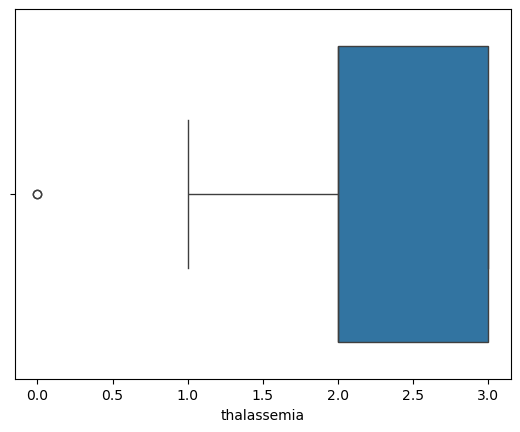

In [13]:
#Check for outliers
sns.boxplot(x=df["thalassemia"])

<Axes: xlabel='cholesterol'>

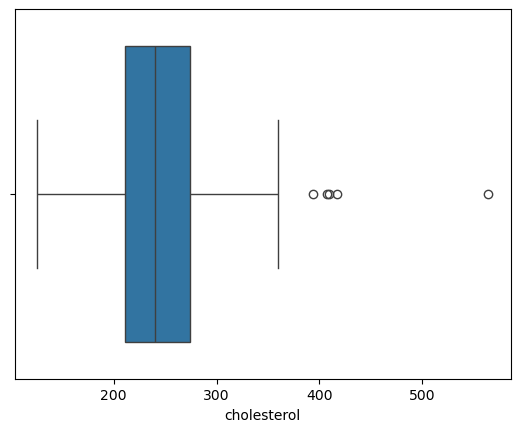

In [14]:
#Check for outliers

sns.boxplot(x=df["cholesterol"])

<Axes: xlabel='resting_blood_pressure'>

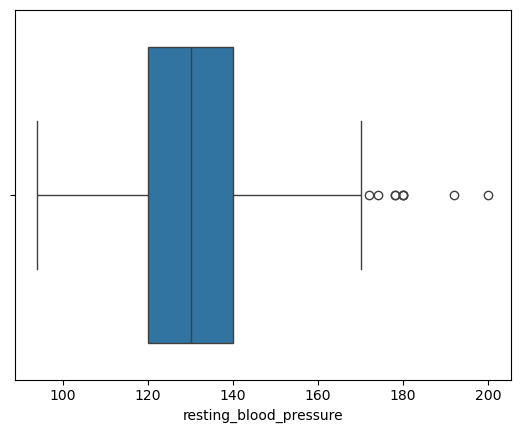

In [15]:
#Check for outliers

sns.boxplot(x=df["resting_blood_pressure"])

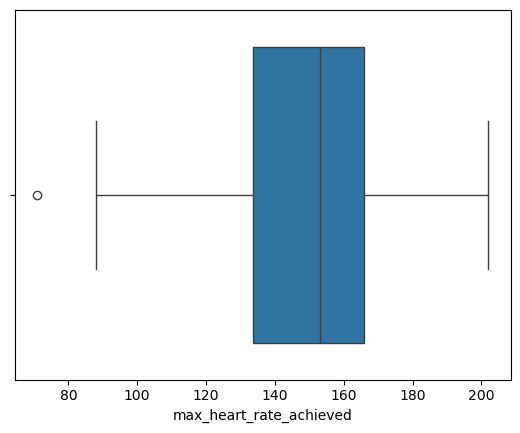

In [16]:
#Check for outlier
sns.boxplot(x=df["max_heart_rate_achieved"]);

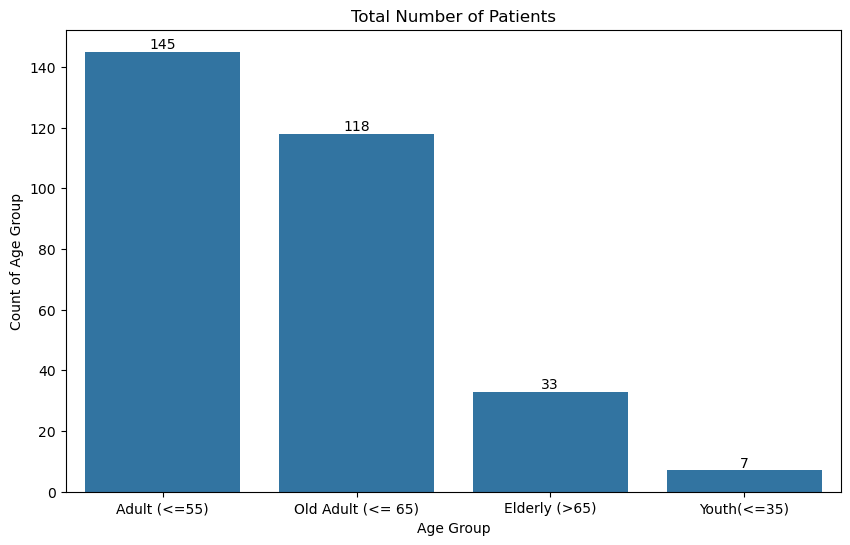

In [176]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a column 'age_bracket'
age_group_counts = df['age_bracket'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

# Annotate the bars with the counts
for i, count in enumerate(age_group_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

The largest number of patients belongs to the "Adult (<=55)" age group with a total number of 145 patients, followed by the "Old Adult (<=65)" group with a total number of 118 patients.
The "Elderly (>65)" group has a significantly lower number of 33 patients.
The "Youth (<=35)" group has the smallest number of 7 patients. This suggests that the patient population is skewed towards older adults, with a relatively smaller proportion of younger individuals

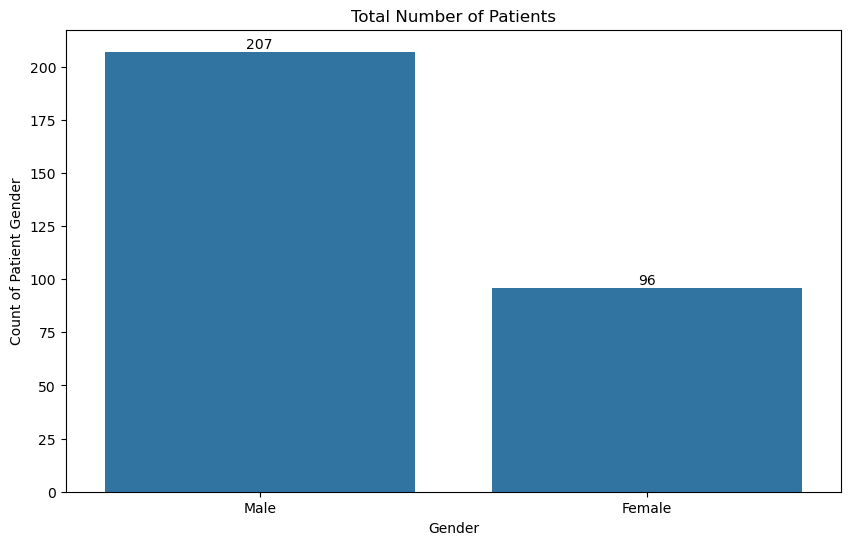

In [173]:
import matplotlib.pyplot as plt

gender_counts = df['gender'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_counts.index, y=gender_counts)
plt.xlabel('Gender')
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients')

# Annotate the bars with the counts
for i, count in enumerate(gender_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

There are significantly more male patients than female patients. This also suggests a clear gender imbalance in the patient population, with a much higher proportion of male patients. Out of the total 303 patients, 207 of them are male while 96 are females

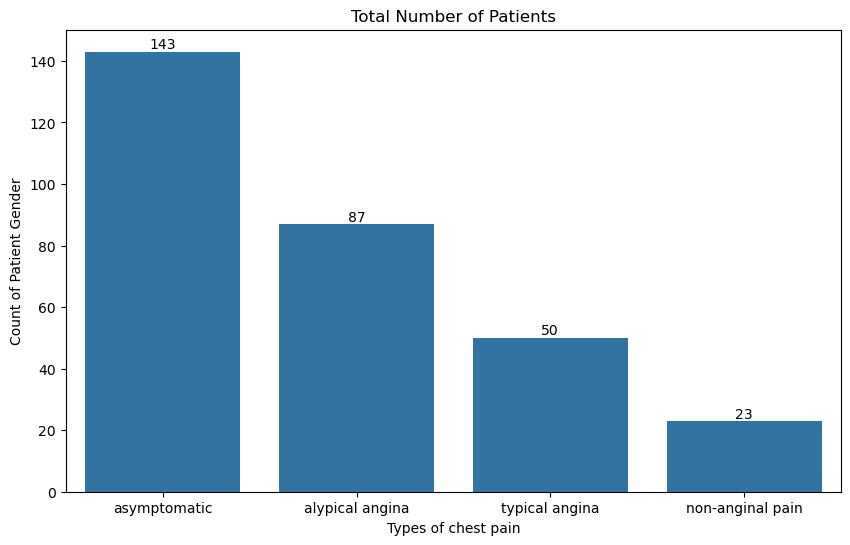

In [179]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a column 'cp_cat'
cp_counts = df['cp_cat'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cp_counts.index, y=cp_counts)
plt.xlabel('Types of chest pain')
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients')

# Annotate the bars with the counts
for i, count in enumerate(cp_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

The bar chart shows the distribution of patients based on their chest pain type.

The most common chest pain type is asymptomatic, followed by atypical angina, typical angina, and non-anginal pain.
143 patients are asymtomatic, 87 have alyical angina type of chest pain, 50 of the patients have typical angina while 23 of the patients have non anginal type of chest pain.

label
yes    165
no     138
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of Patients')

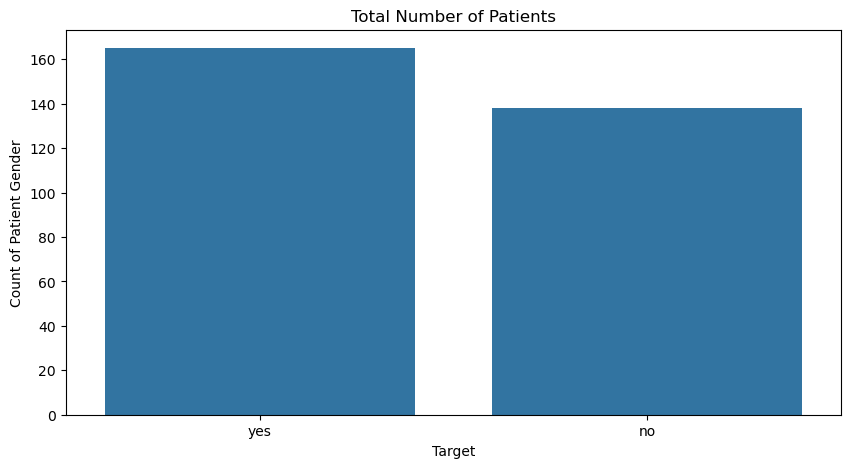

In [20]:
#Data Visualization
# target - have disease or not (1=yes, 0=no)
def label(tg):
    if tg == 1:
        return "yes"
    else:
        return "no"
    
df["label"] = df["target"].apply(label)

#Total patient in each category
print(df["label"].value_counts())

#Investigating- the gender of patients
plt.figure(figsize = (10, 5))
sns.countplot(x="label", data=df)
plt.xlabel("Target")
plt.ylabel("Count of Patient Gender")
plt.title("Total Number of Patients")

The bar chart shows the distribution of patients based on whether they have the disease (target). The chart indicates that there are more patients without the disease ("no") compared to those with the disease ("yes"). Those with the disease "yes" are 165 patients, while those without the disease "no" are 138 patients.

### Bivariate Analysis 
(When we talk about bivariate analysis, we are taking two columns or features and comparing them together)

Bivariate analysis explores the relationship between two variables. Here are some common types of visualizations for bivariate analysis, along with their strengths and weaknesses:

Categorical vs. Categorical Data:

    Cross Tabulation:
        Strengths: Shows the joint frequency distribution of two categorical variables, useful for identifying relationships like association or independence.
        Weaknesses: Can become overwhelming with many categories, limited in conveying the strength of the relationship.
    Heatmap:
        Strengths: Visually represents the cross-tabulation in a color-coded format, good for identifying patterns and clusters.
        Weaknesses: Can be difficult to read with many categories, doesn't show the exact counts.

Categorical vs. Numerical Data:

    Bar Charts with Error Bars:
        Strengths: Shows the distribution of a numerical variable for each category of the categorical variable, can incorporate error bars to represent uncertainty.
        Weaknesses: Can become cluttered with many categories, limited in showing the underlying distribution within categories.
    Violin Plots:
        Strengths: Displays the distribution of a numerical variable for each category, including median, quartiles, and potential outliers, can be visually appealing.
        Weaknesses: Can be challenging to compare distributions with many categories.

Numerical vs. Numerical Data:

    Scatter Plots:
        Strengths: The most fundamental tool, shows the relationship between two numerical variables, reveals trends and potential outliers.
        Weaknesses: Can be cluttered with many data points, doesn't show the strength of the relationship.
    Correlation Matrix:
        Strengths: Displays the correlation coefficients between multiple numerical variables, useful for exploring relationships in a dataset with many numerical variables.
        Weaknesses: Less intuitive than visualizations for single pairs of variables.

Additional Considerations for Numerical vs. Numerical Data:

    Regression Lines:
        Overlay a regression line on a scatter plot to visualize the linear relationship between the variables (if appropriate).
    Pair Plots:
        Use tools like Seaborn to create a grid of scatter plots showing all pairwise relationships between numerical variables in a dataset with many variables.

Choosing the Right Visualization:

The best visualization for bivariate analysis depends on the type of data (categorical or numerical) and the specific research question you're trying to answer. Here are some general guidelines:

    For exploring the joint frequency distribution of categorical variables, use cross-tabulation or heatmaps.
    For comparing the distribution of a numerical variable across categories, use bar charts with error bars or violin plots.
    For exploring the relationship between two numerical variables, use scatter plots.
    For visualizing relationships between multiple numerical variables, use correlation matrices or pair plots.
    Consider adding regression lines to scatter plots if exploring a linear relationship.

Remember:

    Clarity: Aim for visualizations that are easily understood by your audience.
    Labeling: Clearly label axes and provide a title for context.
    Customization: Utilize customization options to enhance clarity (colors, styles, scales).
    Interpretation: Consider additional factors like outliers or non-linear relationships when interpreting the visualizations.

By effectively choosing and interpreting these visualizations, you can gain valuable insights into the relationships between two variables in your data.



Text(0.5, 1.0, 'Distribution of Patients by Age Group and Target Feature')

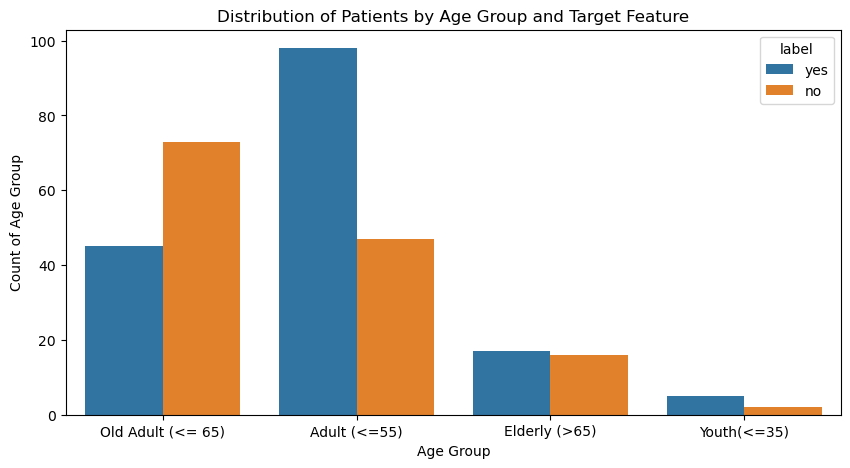

In [189]:
#Investigating the age group of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x="age_bracket", data=df, hue="label")
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Distribution of Patients by Age Group and Target Feature")

In [23]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_ssugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (<= 65),Male,non-anginal pain,yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=55),Male,alypical angina,yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult (<=55),Female,typical angina,yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult (<= 65),Male,typical angina,yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult (<= 65),Female,asymptomatic,yes


Text(0.5, 1.0, 'Distribution of Patients by Gender and Target Feature')

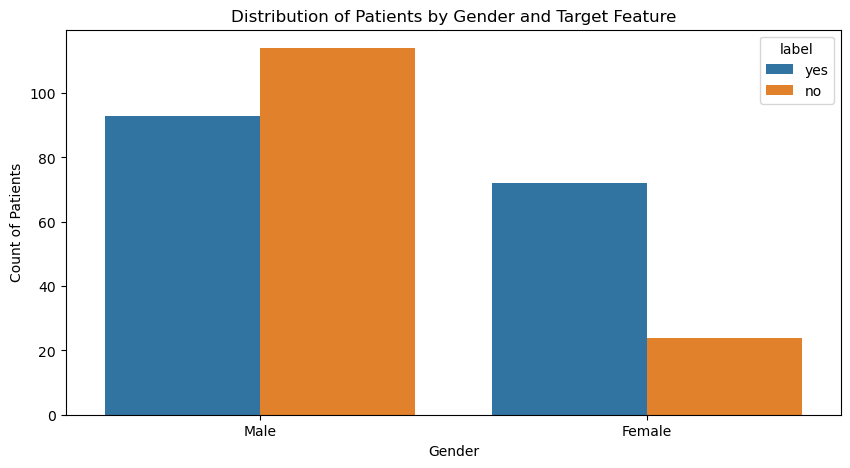

In [193]:
#Investigating the gender of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x="gender", data=df, hue="label")
plt.xlabel("Gender")
plt.ylabel("Count of Patients")
plt.title("Distribution of Patients by Gender and Target Feature")

Text(0.5, 1.0, 'Distribution of Patients by Types of Chest Pain')

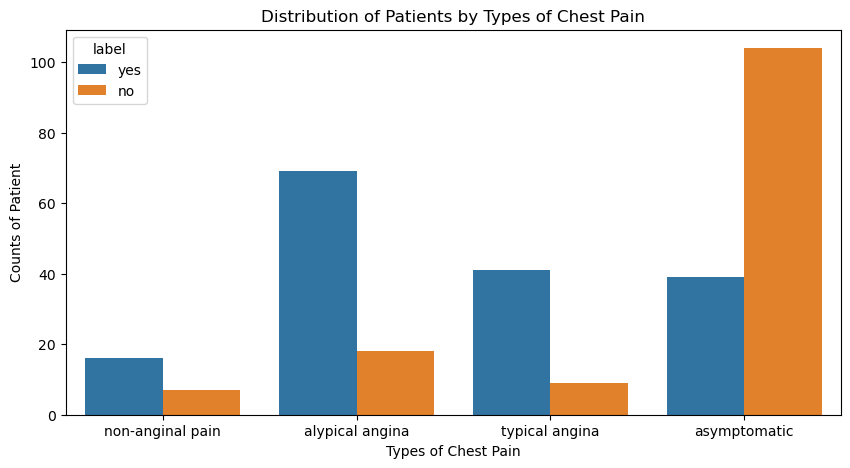

In [25]:
#Investigating the counts of patients by the target feature "chest_pain_type"
plt.figure(figsize = (10, 5))
sns.countplot(x="cp_cat", data=df, hue="label")
plt.xlabel("Types of Chest Pain")
plt.ylabel("Counts of Patient")
plt.title("Distribution of Patients by Types of Chest Pain")

### Multivariate Analysis
(Multivariate analysis will be comparing three or more features or columns)

Multivariate analysis deals with datasets containing more than two variables. Visualizing these relationships can be challenging,

 but here are some common approaches:

Dimensionality Reduction Techniques:

    Scatter Plot Matrix:
        Strengths: Creates a grid of scatter plots, showing pairwise relationships between all numerical variables.
        Weaknesses: Can become overwhelming with many variables, difficult to identify complex relationships beyond pairwise interactions.
    Parallel Coordinates:
        Strengths: Represents each data point as a line connecting its values on all dimensions, useful for identifying clusters or outliers in high-dimensional data.
        Weaknesses: Can be difficult to interpret with many variables, overlapping lines can obscure patterns.
    Principal Component Analysis (PCA):
        Strengths: Reduces dimensionality by identifying the most important underlying factors (principal components) explaining the variance in the data.
        Weaknesses: Requires understanding of PCA concepts, visualizations based on principal components might be less intuitive for non-technical audiences.

3D Visualization (Limited Use):

    3D Scatter Plots:
        Strengths: Can be helpful for visualizing relationships between three variables, allows for some rotation to explore different perspectives.
        Weaknesses: Difficult to interpret with more than three variables, occlusion (objects in front blocking others) can make it challenging to see all data points.

Other Techniques:

    Heatmaps:
        When used for multivariate data, color intensity can represent the value of a third variable in addition to the two dimensions shown on the axes.
        Strengths: Can reveal patterns in relationships between multiple variables.
        Weaknesses: Can be difficult to interpret with many variables, color perception limitations may affect readability.
    Interactive Visualizations:
        Strengths: Allow users to explore the data dynamically by filtering, brushing, or highlighting specific subsets, useful for revealing hidden patterns.
        Weaknesses: Requires more advanced development skills, may not be suitable for static reports or presentations.

Choosing the Right Visualization:

The most suitable visualization for multivariate analysis depends on several factors:

    Number of variables: Techniques like scatter plot matrices become cumbersome with many variables.
    Data type (categorical vs. numerical): Some techniques like parallel coordinates are best suited for numerical data.
    Complexity of relationships: Simple scatter plots might suffice for basic pairwise relationships, while dimensionality reduction or interactive visualizations might be needed for complex interactions.
    Audience: Consider the technical background of your audience when choosing visualization complexity.

Additional Considerations:

    Clarity: Aim for visualizations that are clear and informative, even with multiple variables.
    Labeling: Clearly label axes and provide a title for context.
    Interactivity: Explore interactive visualizations when appropriate to enhance understanding.
    Interpretation: Be cautious of overinterpreting complex visualizations; combine them with statistical tests for robust conclusions.

By understanding these visualization techniques and carefully considering your data and audience, you can effectively present insights from multivariate analysis. Remember, sometimes a combination of different visualizations may be necessary to capture the full picture of complex relationships in your data.
 

In [27]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_ssugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (<= 65),Male,non-anginal pain,yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=55),Male,alypical angina,yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult (<=55),Female,typical angina,yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult (<= 65),Male,typical angina,yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult (<= 65),Female,asymptomatic,yes


In [28]:
#Remove the newly created columns because they are not numerical
columns_to_remove = ["age_bracket", "gender", "cp_cat", "label"]
df_new = df.drop(columns_to_remove, axis=1)

<Axes: title={'center': 'Correlation Heatmap'}>

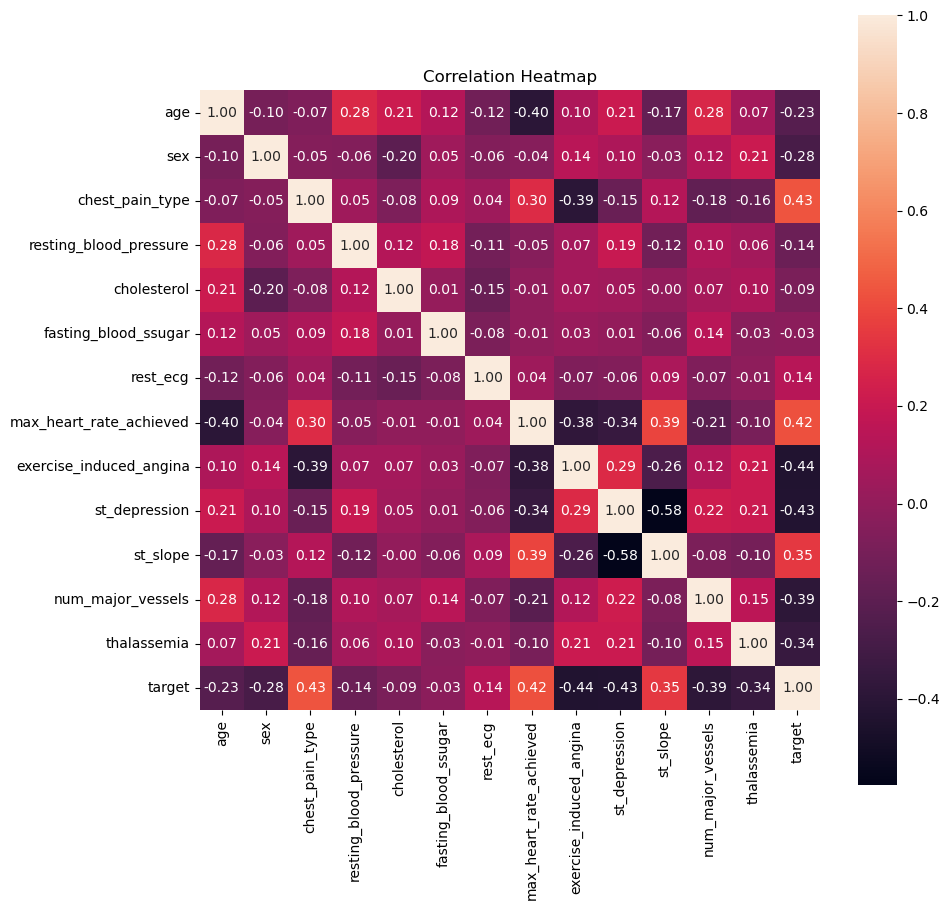

In [29]:
#Correlation between SalePrice and other variables in the dataset
plt.figure(figsize = (10, 10))
plt.title("Correlation Heatmap")

hm = sns.heatmap(df_new.corr(), cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10})
hm

Strong Positive Correlations: There are several strong positive correlations (red squares) between variables such as:

        "chest_pain_type" and "target" with correlation of 0.43
        "max_heart_rate_achieved" and "target" with correlation of 0.42
        "max_heart_rate_achieved" and "st_slope" with correlation of 0.39
        "max_heart_rate_achieved" and "exercise_induced_angina" with correlation of 0.38
        "st_slope" and "target" with correlation of 0.35
        "chest_pain" and "max_heart_rate_achieved" with correlation of 0.30
        
    Strong Negative Correlations: There are also some strong negative correlations (dark squares) between variables such as:
        "st_slope" and "st_depression" with correlation of -0.58
        "exercise_induced_angina" and "target" with correlation of -0.44
        "st_depression" and "target" with correlation of -0.43
        "num_major_vessels" and "target" with correlation of -0.39
        "exercise_induced_angina" and "max_heart_rate_achieved" with correlation of -0.38
        "thalassemia" and "target" with correlation of -0.34
        
        
        
    Other Correlations: Several other variables exhibit moderate positive or negative correlations, indicating relationships of varying strengths.



In [30]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_ssugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (<= 65),Male,non-anginal pain,yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=55),Male,alypical angina,yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult (<=55),Female,typical angina,yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult (<= 65),Male,typical angina,yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult (<= 65),Female,asymptomatic,yes


### FEATURE ENGINEERING AND DATA PREPROCESSING

In [32]:
# Create a copy of the data (Exclude target/label alongside other columns that were created)

df1 = df[["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_ssugar", "rest_ecg", "max_heart_rate_achieved", "exercise_induced_angina", "st_depression", "st_slope", "num_major_vessels", "thalassemia"]]

label = df[["target"]]

In [33]:
df1.head() #Question

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_ssugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [34]:
label.head() #Answer

,target
0,1
1,1
2,1
3,1
4,1


In [35]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_ssugar         int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [36]:
#Dealing with Outliers - resting_blood_pressure, cholesterol, thalassemia 

#Normalize the data
scaler = MinMaxScaler()

df1["Scaled_RBP"] = scaler.fit_transform(df1["resting_blood_pressure"].values.reshape(-1, 1))
df1["Scaled_chol"] = scaler.fit_transform(df1["cholesterol"].values.reshape(-1, 1))
df1["Scaled_thal"] = scaler.fit_transform(df1["thalassemia"].values.reshape(-1, 1))
df1["Scaled_max_heart_rate"] = scaler.fit_transform(df1["max_heart_rate_achieved"].values.reshape(-1, 1))

#df1.drop(["resting_blood_pressure", "thalassemia", "cholesterol", "max_heart_rate_achieved"], axis=1, inplace=True)

df1.head()

C:\Users\igho\AppData\Local\Temp\ipykernel_23696\1648413690.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Scaled_RBP"] = scaler.fit_transform(df1["resting_blood_pressure"].values.reshape(-1, 1))
C:\Users\igho\AppData\Local\Temp\ipykernel_23696\1648413690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Scaled_chol"] = scaler.fit_transform(df1["cholesterol"].values.reshape(-1, 1))
C:\Users\igho\AppData\Local\Temp\ipykernel_23696\1648413690.py:8: SettingWithCopyWarning: 
A value is trying t

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_ssugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0.481132,0.244292,0.333333,0.603053
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0.339623,0.283105,0.666667,0.885496
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0.339623,0.178082,0.666667,0.770992
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0.245283,0.251142,0.666667,0.816794
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0.245283,0.520548,0.666667,0.702290


In [37]:
#Now that we have created four new columns without outliers(Scaled_RBP, Scaled_chol, Scaled_thal, Scaled_max_heart_rate), lets replace them with the column that have outliers (resting_blood_pressure", "thalassemia", "cholesterol", "max_heart_rate_achieved)

df1.drop(["resting_blood_pressure", "thalassemia", "cholesterol", "max_heart_rate_achieved"], axis=1, inplace=True)

df1.head()

C:\Users\igho\AppData\Local\Temp\ipykernel_23696\4119718334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(["resting_blood_pressure", "thalassemia", "cholesterol", "max_heart_rate_achieved"], axis=1, inplace=True)


,age,sex,chest_pain_type,fasting_blood_ssugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


### MACHINE LEARNING

In [39]:
#Split the dataset into training and testing sets - X = Questions, y = Answers
#X_train is the practice questions, y_train is the answers to those practice questions.
#y_test is for the examiner. X_test is the exam itself
#train_test_split(df1, label) is trying to split the data into df1 and label.
#test_size=0.2. This simply mean that we are assigning 20% of the data for the test while the remaining 80% is assigned for training the machine
#random_state means we are taking random columns and we are setting it at 42

X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [40]:
X_train.head()  #This is the practice questions. The machine will go through the data to know if the patients have heart disease. Basically, the machine is training with the practice questions

,age,sex,chest_pain_type,fasting_blood_ssugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153
75,55,0,1,0,0,0,1.4,1,0,0.386792,0.283105,0.666667,0.687023
176,60,1,0,1,1,1,1.4,2,2,0.216981,0.237443,1.000000,0.679389


In [41]:
y_train.head() #This is the practice answers.

,target
132,1
202,0
196,0
75,1
176,0


In [42]:
X_test.head()

,age,sex,chest_pain_type,fasting_blood_ssugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
179,57,1,0,0,0,1,0.6,1,1,0.528302,0.342466,0.333333,0.312977
228,59,1,3,0,0,0,0.2,1,0,0.716981,0.369863,1.000000,0.671756
111,57,1,2,1,1,0,0.2,2,1,0.528302,0.000000,1.000000,0.778626
246,56,0,0,0,0,1,1.9,1,2,0.377358,0.646119,1.000000,0.603053
60,71,0,2,1,0,0,0.0,2,1,0.150943,0.317352,0.666667,0.450382


In [43]:
y_train.head()

,target
132,1
202,0
196,0
75,1
176,0


### Model Building

In [44]:
#Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-score: 0.8387096774193549
AUC-ROC: 0.8372844827586207


C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest outperforms Logistic Regression in most metrics except precision.

In [45]:
#The machine is testing on 61 (20%) rows as it can be seen from the data deisplayed below.
X_test

,age,sex,chest_pain_type,fasting_blood_ssugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
179,57,1,0,0,0,1,0.6,1,1,0.528302,0.342466,0.333333,0.312977
228,59,1,3,0,0,0,0.2,1,0,0.716981,0.369863,1.000000,0.671756
111,57,1,2,1,1,0,0.2,2,1,0.528302,0.000000,1.000000,0.778626
246,56,0,0,0,0,1,1.9,1,2,0.377358,0.646119,1.000000,0.603053
60,71,0,2,1,0,0,0.0,2,1,0.150943,0.317352,0.666667,0.450382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,0,0,0,2.0,1,3,0.433962,0.292237,1.000000,0.572519
104,50,1,2,0,1,0,0.0,2,0,0.330189,0.159817,0.666667,0.702290
300,68,1,0,1,1,0,3.4,1,2,0.471698,0.152968,1.000000,0.534351
193,60,1,0,0,0,1,2.8,1,2,0.481132,0.356164,1.000000,0.541985


In [46]:
#below are the predictions according to the ly_pred model we just developed. From the precdictions using Logistic Regression: Accuracy is 0.8360655737704918, Precision: is 0.8666666666666667
#Recall: is 0.8125, F1-score is 0.8387096774193549, AUC-ROC is 0.8372844827586207
#if we want to analyze the predictions from this logistic regression, patient with number 179 is 0(no heart disease). The prediction got that correctly. Patient with ID 228 is 0 (no heart disease), the prediction predicted 1(have heart disease). The logistic regression got it wrong. The patient with ID 111 has heart disease. Logistics Regression predicted it correctly because from its predictions, its 1 also meaning the patient have heart disease. It also got the predictions for patient 246 and patient 60 as they have 0 and 1 respectively. The accuracy from this Logistic Regression model is 0.836. We will also try other models to see which performs better 

ly_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [47]:
y_test.head()

,target
179,0
228,0
111,1
246,0
60,1


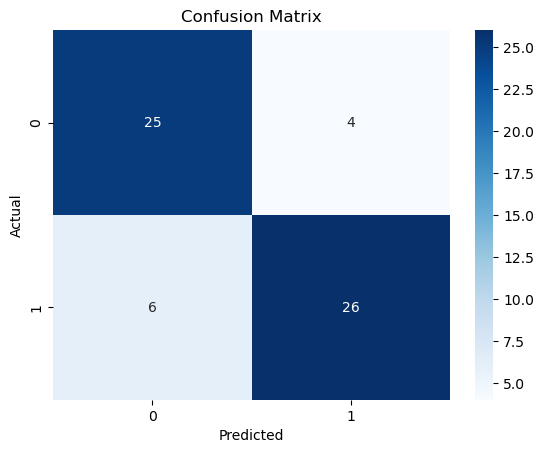

In [48]:
#Create a confusion Matrix for the logistics regression
lcm = confusion_matrix(y_test, ly_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [49]:
# Model Building
#Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precission:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Classifier
Accuracy: 0.8524590163934426
Precission: 0.8709677419354839
Recall: 0.84375
F1-score: 0.8571428571428571
AUC-ROC: 0.8529094827586207


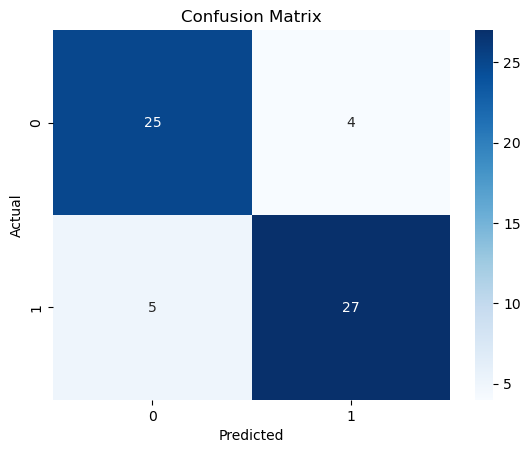

In [50]:
# Create a Confusion Matrix for Random Forest
rcm = confusion_matrix(y_test, rfy_pred)

#Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Comparing the two models created, 

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-score: 0.8387096774193549
AUC-ROC: 0.8372844827586207
    

    
Random Forest Classifier
Accuracy: 0.8524590163934426
Precission: 0.8484848484848485
Recall: 0.875
F1-score: 0.8615384615384615
AUC-ROC: 0.8512931034482758

It can be seen that in terms of Accuracy, Recall, F!-score and AUC-ROC, Random Forest Classifier is doing better than Logistic Regression. Logistics Regression only performed better with its precision. 
    

In [52]:
# 8 Machine Learning Algorithms will be applied to the dataset

classifiers = [[XGBClassifier(), "XGB Classifier"],
              [RandomForestClassifier(), "Random Forest"],
              [KNeighborsClassifier(), "K-Nearest Neighbours"],
              [SVC(), "SVC"],
              [GaussianNB(), "Naive Bayes"],
              [DecisionTreeClassifier(random_state = 42), "Decision tree"],
              [LogisticRegression(), "Logistic Regression"]
              ]

In [53]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassifier(random_state=42), 'Decision

In [54]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + "%"])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + "%"])
    recall_list[model_name] = ([str(round(p_score*100, 2)) + "%"])
    roc_list[model_name] = ([str(round(p_score*100, 2)) + "%"])
    
    if model_name != classifiers[-1][1]:
        print(" ")

C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [55]:
#Below are the outcome of the empty dictionary lists we created

In [56]:
acc_list

{'XGB Classifier': ['81.97%'],
 'Random Forest': ['85.25%'],
 'K-Nearest Neighbours': ['75.41%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decision tree': ['85.25%'],
 'Logistic Regression': ['83.61%']}

In [57]:
precision_list

{'XGB Classifier': ['86.21%'],
 'Random Forest': ['84.85%'],
 'K-Nearest Neighbours': ['79.31%'],
 'SVC': ['65.71%'],
 'Naive Bayes': ['90.0%'],
 'Decision tree': ['92.59%'],
 'Logistic Regression': ['86.67%']}

In [58]:
recall_list

{'XGB Classifier': ['86.21%'],
 'Random Forest': ['84.85%'],
 'K-Nearest Neighbours': ['79.31%'],
 'SVC': ['65.71%'],
 'Naive Bayes': ['90.0%'],
 'Decision tree': ['92.59%'],
 'Logistic Regression': ['86.67%']}

In [59]:
roc_list

{'XGB Classifier': ['86.21%'],
 'Random Forest': ['84.85%'],
 'K-Nearest Neighbours': ['79.31%'],
 'SVC': ['65.71%'],
 'Naive Bayes': ['90.0%'],
 'Decision tree': ['92.59%'],
 'Logistic Regression': ['86.67%']}

### We can display our outcome in a table. SInce its a dictionary, it becomes so easy putting it in a table

In [61]:
print("Accuracy Score")
accuracy_table = pd.DataFrame(acc_list)
accuracy_table.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SVC,Naive Bayes,Decision tree,Logistic Regression
0,81.97%,85.25%,75.41%,65.57%,86.89%,85.25%,83.61%


In [62]:
print("Precision Score")
precision_table = pd.DataFrame(precision_list)
precision_table.head()

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.21%,84.85%,79.31%,65.71%,90.0%,92.59%,86.67%


In [63]:
print("Recall Score")
recall_table = pd.DataFrame(recall_list)
recall_table.head()

Recall Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.21%,84.85%,79.31%,65.71%,90.0%,92.59%,86.67%


In [64]:
print("ROC Score")
roc_table = pd.DataFrame(roc_list)
roc_table.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.21%,84.85%,79.31%,65.71%,90.0%,92.59%,86.67%


Further Model Comparison:

A variety of classifiers, including XGBoost, K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), Naive Bayes, Decision Tree, and Logistic Regression, are applied to the dataset. This comparison aims to find the best performing model based on metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.
Conclusion:

    Random Forest Classifier performed the best overall in this initial comparison.
    Logistic Regression showed strong precision but was outperformed by Random Forest in terms of recall and F1-score.

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize model
log_reg = LogisticRegression()

# GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and AUC-ROC score
print("Best Parameters: ", grid_search.best_params_)
print("Best AUC-ROC Score: ", grid_search.best_score_)


C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Best Parameters:  {'C': 1, 'solver': 'liblinear'}
Best AUC-ROC Score:  0.8914677914677913


C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_mode

In [207]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize model
rf_model = RandomForestClassifier()

# GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='roc_auc', cv=5)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters: ", grid_search_rf.best_params_)
print("Best AUC-ROC Score: ", grid_search_rf.best_score_)


C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

Best Parameters:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best AUC-ROC Score:  0.914026714026714


AUC-ROC CURVE

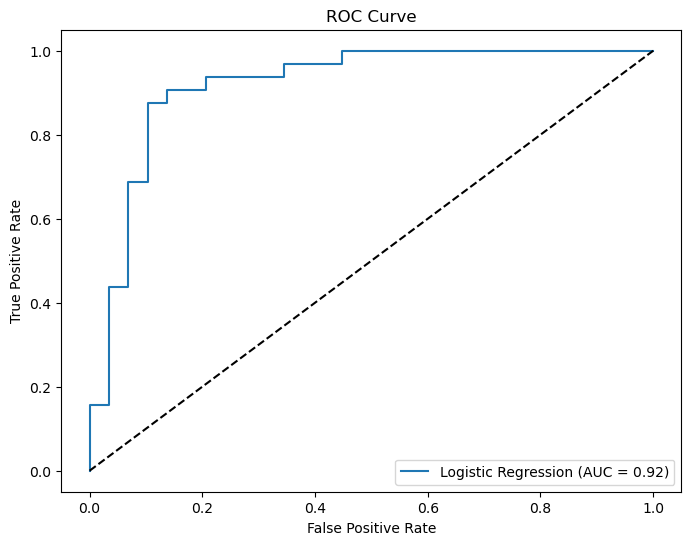

In [209]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [217]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for logistic regression
log_reg_cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation AUC-ROC scores: {log_reg_cv_scores}")
print(f"Mean AUC-ROC: {log_reg_cv_scores.mean():.4f}")


Cross-validation AUC-ROC scores: [0.81649832 0.94444444 0.86772487 0.93531469 0.89335664]
Mean AUC-ROC: 0.8915


C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\igho\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

SAVE MODELS

In [220]:
import pickle

# Save the fine-tuned model
with open('heart_disease_model.pkl', 'wb') as model_file:
    pickle.dump(grid_search.best_estimator_, model_file)
